In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
import seaborn as sns

In [2]:
def define_plot_style():
    # Define plot paramters
    # Use seaborn style
    sns.set()
    
    plot_style = {
        'figure.dpi': 200,
        'figure.autolayout':True,
        'lines.linewidth': 2,
        'lines.linestyle': '-',
        'lines.marker': '',
        'lines.markersize': 10,
        'legend.fontsize': 20,
        'legend.loc': 'best',
        'axes.titlesize': 24,
        'font.size': 22,
        'axes.labelsize': 20
        
    }
    mpl.rcParams.update(plot_style)

In [3]:
# optimisation history path
#optim_hist_path = '../wf-outputs/optim-hist/optim_hist_poly_project_{}_bins.npy'
optim_hist_path = '../wf-outputs/optim-hist/optim_hist_poly_%s_cycles_256_hd_proj_%s_%s_1.npy'

In [4]:
# Load optimisation history
dataset_list = [('2', 'eval', 'param'),('2', 'eval', 'full'),('2', 'reset_eval', 'param'),('2', 'reset_eval', 'full'),('5', 'eval', 'param'),('5', 'eval', 'full'),('5', 'reset_eval', 'param'),('5', 'reset_eval', 'full')]
n_cycles_list = [2,5]
dataset_list.reverse()
optim_hist_list = [np.load(optim_hist_path % data_params, allow_pickle=True)[()] for data_params in dataset_list]


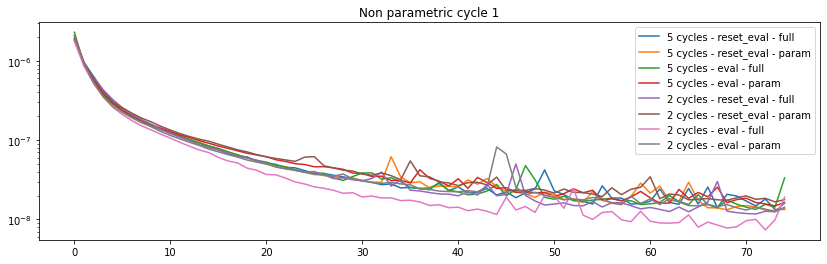

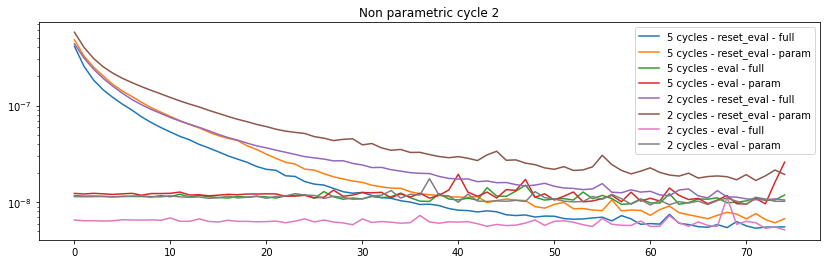

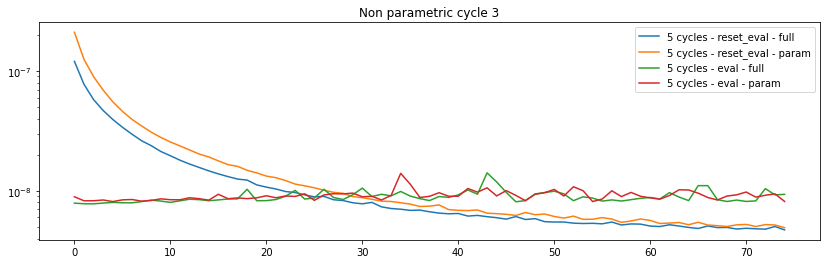

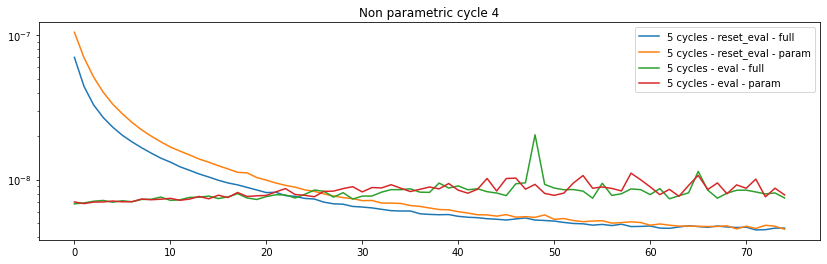

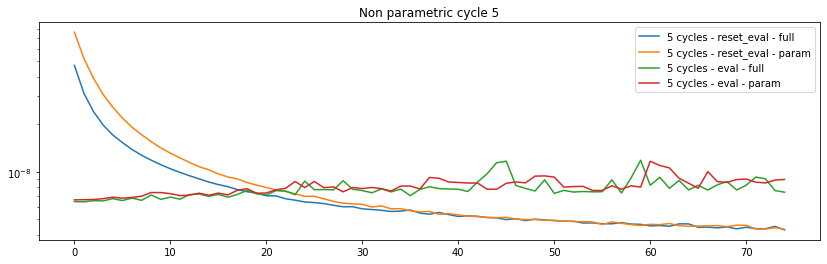

In [5]:
plot_loss = 'val_loss' # options are: 'loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'

for cycle_idx in range(n_cycles_list[-1]):
    # plt.figure(figsize=(14,4))
    # for idx,hist_stars in enumerate(optim_hist_list):
    #     if int(dataset_list[idx][0]) >= cycle_idx+1:
    #         plt.plot(hist_stars['param_cycle{}'.format(cycle_idx+1)][plot_loss], label='%s cycles - %s - %s' % dataset_list[idx])
    # #plt.yscale('log')
    # plt.title('Parametric cycle {}'.format(cycle_idx+1))
    # plt.legend()
    # plt.show()

    plt.figure(figsize=(14,4))
    for idx,hist_stars in enumerate(optim_hist_list):
        if int(dataset_list[idx][0]) >= cycle_idx+1:
            plt.plot(hist_stars['nonparam_cycle{}'.format(cycle_idx+1)][plot_loss], label='%s cycles - %s - %s' % dataset_list[idx])
    plt.yscale('log')
    plt.title('Non parametric cycle {}'.format(cycle_idx+1))
    plt.legend()
    plt.show()



## plot optim curves for the report

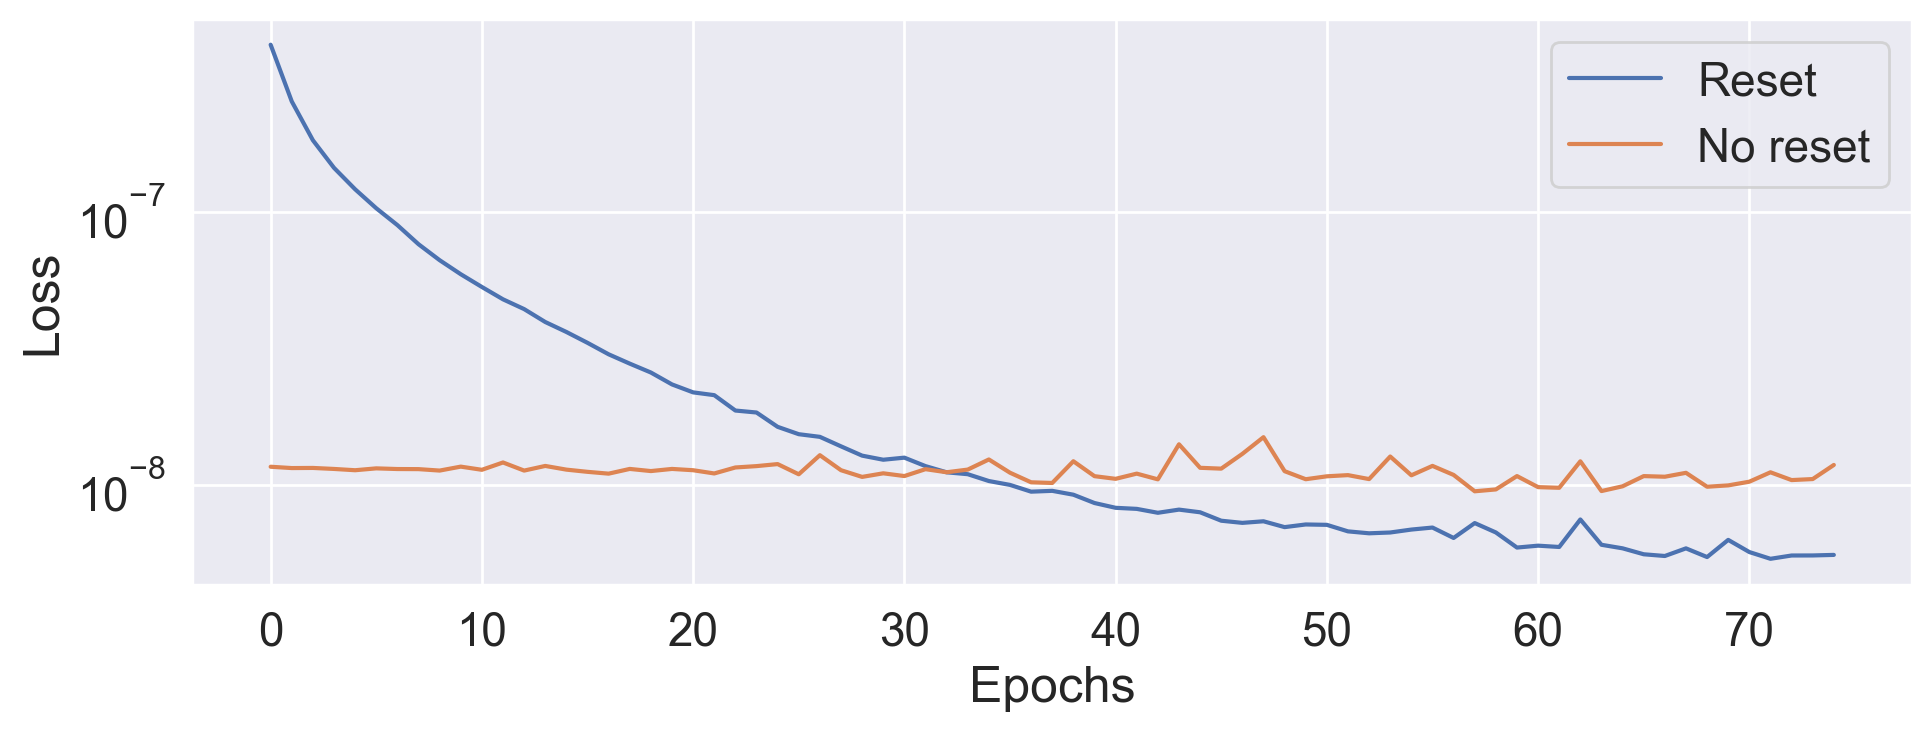

In [10]:
define_plot_style()
sns.set(font_scale=1.5)

cycle_idx=1
plt.figure(figsize=(10,4))
plt.plot(optim_hist_list[0]['nonparam_cycle{}'.format(cycle_idx+1)][plot_loss], label='Reset')
plt.plot(optim_hist_list[2]['nonparam_cycle{}'.format(cycle_idx+1)][plot_loss], label='No reset')
plt.yscale('log')
#plt.title('Non parametric cycle {}'.format(cycle_idx+1))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('../figures/optimisation_curves_reset_vs_no_reset-new_scenario.pdf')
plt.show()